# 📚 Personal Setting

In [1]:
from tsel_aagm.matching import *
from tsel_aagm.azuka_charts import *


In [2]:
# from causalinference_aagm.matching import PropensityScoreMatch as psm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
import importlib

# font_path = '/data/vscode/azkaram/azkaram/04_attributes/fonts/Poppins-Regular.ttf'
# font_path_bold = '/data/vscode/azkaram/azkaram/04_attributes/fonts/Poppins-Bold.ttf'

font_path = '/Users/azkaram/Documents/01_Development/05_python/02_data_vis_library/fonts/Poppins-Regular.ttf'
font_path_bold = '/Users/azkaram/Documents/01_Development/05_python/02_data_vis_library/fonts/Poppins-Bold.ttf'

custom_font = fm.FontProperties(fname=font_path).get_name()
custom_font_bold = fm.FontProperties(fname=font_path_bold).get_name()
fm.fontManager.addfont(font_path)
fm.fontManager.addfont(font_path_bold)

custom_colors = ['#0472f7', '#06b45e', '#fc3d51', '#66d2ff', '#dab236', '#c1a2c2']
blue, green, red, sky, yellow, purple = custom_colors

import matplotlib as mpl

# Define themes
themes = {
    "dark": {
        "background": "#282c34",
        "edge": "#444444",
        "text": "#BBBBBB",
        "grid": "#444444"
    },
    "light": {
        "background": "#FFFFFF",
        "edge": "#CCCCCC",
        "text": "#686868",
        "grid": "#DDDDDD"
    }
}

def set_theme(name="dark", custom_font="DejaVu Sans", custom_colors=None, bar_edge=False):
    """
    Switch between light and dark Matplotlib themes.
    
    Parameters
    ----------
    name : str
        "dark" or "light"
    custom_font : str
        Font family to use
    custom_colors : list
        Custom color cycle (hex codes or matplotlib colors)
    bar_edge : bool or str
        - False: no edge color on bars
        - True: use default edge
        - str: hex color or named color for bar edges
    """
    if name not in themes:
        raise ValueError(f"Theme '{name}' not found. Choose from {list(themes.keys())}")

    theme = themes[name]

    # default edgecolor setting
    if bar_edge is False:
        patch_edge = "none"   # no edge
    elif bar_edge is True:
        patch_edge = theme["edge"]  # use theme edge
    else:
        patch_edge = bar_edge  # user-specified color

    mpl.rcParams.update({
        'axes.facecolor': theme["background"],
        'axes.edgecolor': theme["edge"],
        'axes.labelcolor': theme["text"],
        'figure.facecolor': theme["background"],
        'figure.edgecolor': theme["edge"],
        'savefig.facecolor': theme["background"],
        'savefig.edgecolor': theme["edge"],
        'xtick.color': theme["text"],
        'ytick.color': theme["text"],
        'grid.color': theme["grid"],
        'text.color': theme["text"],
        'axes.grid': True,
        'axes.spines.top': True,
        'axes.spines.right': True,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'grid.linestyle': '--',
        'grid.alpha': 0.8,
        'lines.linewidth': 2,
        'font.size': 12,
        'font.family': custom_font,
        'axes.prop_cycle': mpl.cycler(color=custom_colors if custom_colors else plt.rcParams['axes.prop_cycle'].by_key()['color']),
        'patch.edgecolor': patch_edge,
        'patch.linewidth': 0.8 if bar_edge else 0  # line width 0 if no edge
    })

set_theme('dark', custom_font=custom_font, custom_colors=custom_colors)

In [4]:
df = pd.read_csv('datasets/healtcare_stroke_data.csv')
def one_hot_encode(df):
    """
    One-hot encodes all object data type columns of a Pandas DataFrame.
    """
    # Get the object columns
    obj_cols = df.select_dtypes(include=['object']).columns
    # One-hot encode the object columns
    df = pd.get_dummies(df, columns=obj_cols)
    return df

df = one_hot_encode(df).fillna(0)
df.head()
df_model = df[['age','hypertension','heart_disease','bmi','stroke','gender_Male','smoking_status_smokes', 'avg_glucose_level']]
df_model.head()

,age,hypertension,heart_disease,bmi,stroke,gender_Male,smoking_status_smokes,avg_glucose_level
0,67.0,0,1,36.6,1,True,False,228.69
1,61.0,0,0,0.0,1,False,False,202.21
2,80.0,0,1,32.5,1,True,False,105.92
3,49.0,0,0,34.4,1,False,True,171.23
4,79.0,1,0,24.0,1,False,False,174.12


# Data Preparation

In [17]:
def hist_all_features(df, features, hue, name):
    width = 6*len(features)
    fig, axes = plt.subplots(ncols=len(features), figsize=(width, 5))
    for i in range(len(features)):
        sns.histplot(data=df, x=features[i], ax=axes[i], hue=hue)
    plt.savefig(name)
    plt.show()


# Matching

In [6]:
features = ['age','hypertension','heart_disease','bmi','gender_Male', 'avg_glucose_level']
treatment = 'smoking_status_smokes'
outcome = 'stroke'

model = PropensityScoreMatch(df_model, features, treatment, outcome)

ATT: 0.010523591731563692
ATE: 0.010523591731563683
ATC: 0.010523591731563671


# Evaluation

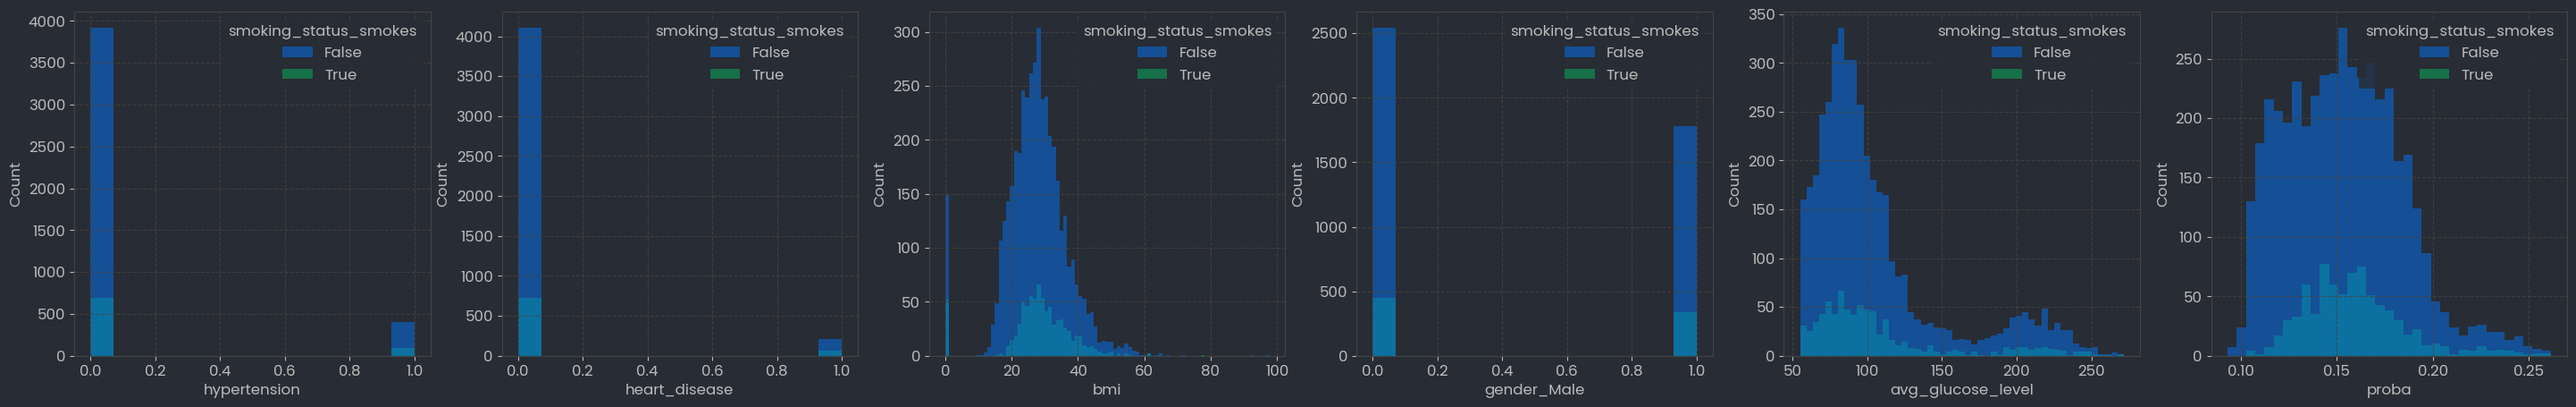

In [18]:
features = ['hypertension','heart_disease','bmi','gender_Male','avg_glucose_level','proba']
hist_all_features(model.df, features, hue='smoking_status_smokes', name='output/dist_1.png')


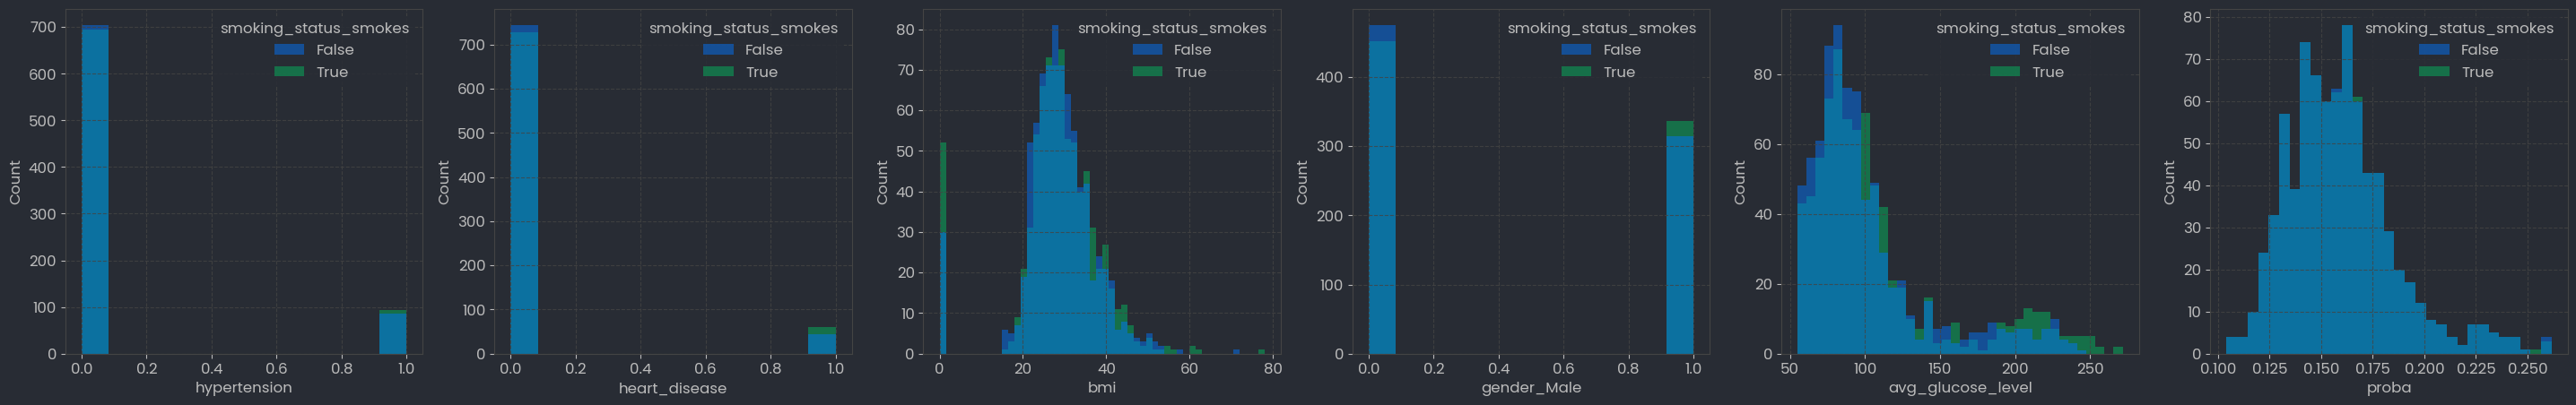

In [19]:
hist_all_features(model.df_matched, features, hue='smoking_status_smokes', name='output/dist_2.png')

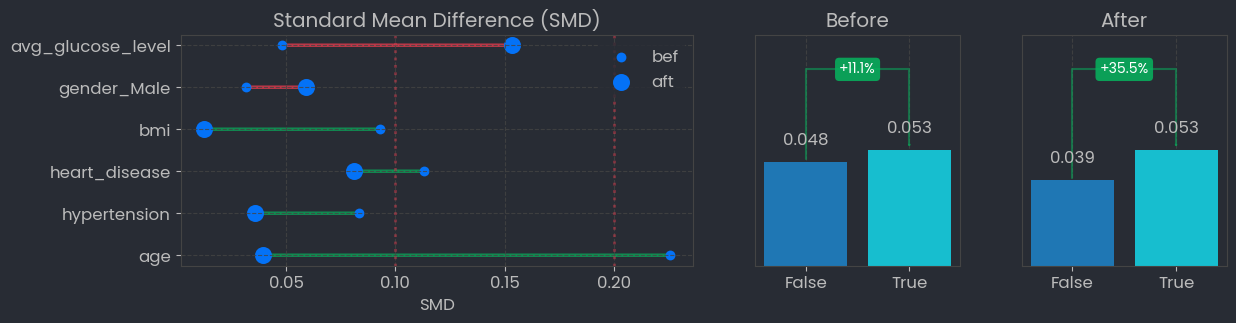

In [20]:
from matplotlib.patches import FancyArrowPatch
r, c = 1, 3
fig, ax = plt.subplots(r, c, figsize=(4.5*c, 3*r), width_ratios=(50,20,20))
ax = ax.flatten()

# Before Matching
stroke_by_treatment = model.df.groupby(treatment)[[outcome]].mean()
categories = stroke_by_treatment.index.values
values = stroke_by_treatment['stroke'].values
custom_bar_arrow(categories=categories,
                 values=values,
                 ax=ax[1])
ax[1].set_title('Before')
ax[1].set_xticks(ticks=[0,1], labels=('False', 'True'))

# After Matching
stroke_by_treatment = model.df_matched.groupby(treatment)[[outcome]].mean()
categories = stroke_by_treatment.index.values
values = stroke_by_treatment['stroke'].values
custom_bar_arrow(categories=categories,
                 values=values,
                 ax=ax[2])
ax[2].set_title('After')
ax[2].set_xticks(ticks=[0,1], labels=('False', 'True'))

# Comparing SMD
x1 = model.df_smd.smd_bef.values
x2 = model.df_smd.smd_aft.values
y = model.df_smd.index.values
labels = model.df_smd.features.values

for i in range(len(y)):
    color = red if x2[i] > x1[i] else green
    arrow = FancyArrowPatch(
        posA=(x1[i], y[i]),
        posB=(x2[i], y[i]),
        arrowstyle="-",
        color=color,
        lw=2.5,
        mutation_scale=12,
        alpha=0.7
    )
    ax[0].add_patch(arrow)

ax[0].scatter(x1, y, color=custom_colors[0], s=50, label='bef')
ax[0].scatter(x2, y, color=custom_colors[0], s=150, label='aft')
ax[0].set_yticks(y, labels=labels)
ax[0].axvline(0.1, color=red, linestyle=':', alpha=0.4)
ax[0].axvline(0.2, color=red, linestyle=':', alpha=0.4)
ax[0].legend(loc='upper right')
ax[0].set_title('Standard Mean Difference (SMD)')
ax[0].set(xlabel='SMD')

plt.savefig('output/out_1.png')
plt.show()